In [105]:
# !pip install "numpy<2.0"
# import numpy
# print(numpy.__version__)
# !pip show numpy  

1) Chargement des données


In [106]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2) Préparation & nettoyage


In [107]:
DATA_PATH = "../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

In [108]:
df.shape
#df.info()

(7043, 21)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [110]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [111]:
df.nunique().sort_values(ascending=False)

customerID          7043
TotalCharges        6531
MonthlyCharges      1585
tenure                73
PaymentMethod          4
DeviceProtection       3
Contract               3
StreamingMovies        3
StreamingTV            3
TechSupport            3
OnlineBackup           3
OnlineSecurity         3
InternetService        3
MultipleLines          3
gender                 2
PhoneService           2
PaperlessBilling       2
Dependents             2
Partner                2
SeniorCitizen          2
Churn                  2
dtype: int64

In [112]:
# for col in df.columns:
#     print(f"\n🟦 {col} ({df[col].nunique()} valeurs uniques):", df[col].unique())
#     # print(df[col].unique())

In [113]:
binary_cols = [
    "Partner",
    "SeniorCitizen",
    "gender",
    "Dependents",
    "PhoneService",
    "PaperlessBilling",
    "Churn",
]

for col in binary_cols:
    print(f"\n🟦 {col} ({df[col].nunique()} uniques values):", df[col].unique())
    # print(df[col].unique())




🟦 Partner (2 uniques values): ['Yes' 'No']

🟦 SeniorCitizen (2 uniques values): [0 1]

🟦 gender (2 uniques values): ['Female' 'Male']

🟦 Dependents (2 uniques values): ['No' 'Yes']

🟦 PhoneService (2 uniques values): ['No' 'Yes']

🟦 PaperlessBilling (2 uniques values): ['Yes' 'No']

🟦 Churn (2 uniques values): ['No' 'Yes']


In [114]:
for col in binary_cols:
    if col == "SeniorCitizen":
        continue
    df[col] = df[col].map({"Yes": 1, "No": 0, "Male": 1, "Female": 0})

# df['gender'] = df['gender'].map({"Male": 1, "Female": 0})

In [115]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [116]:
cat_cols = [
    "PaymentMethod",
    "StreamingMovies",
    "TechSupport",
    "OnlineBackup",
    "StreamingTV",
    "DeviceProtection",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "Contract"
]

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [117]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,DeviceProtection_No internet service,DeviceProtection_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,Contract_One year,Contract_Two year
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,False,True,False,False,False,False,False,False,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,...,False,True,False,False,False,False,False,True,True,False
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,False,False,False,False,False,False,True,False,False
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,False,True,True,False,False,False,False,True,True,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,True,False,False,False,False,False


In [118]:
df.dtypes

customerID                                object
gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                              object
Churn                                      int64
PaymentMethod_Credit card (automatic)       bool
PaymentMethod_Electronic check              bool
PaymentMethod_Mailed check                  bool
StreamingMovies_No internet service         bool
StreamingMovies_Yes                         bool
TechSupport_No internet service             bool
TechSupport_Yes                             bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
StreamingTV_No inter

In [119]:
df.drop(columns=["customerID"], inplace=True)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")


In [120]:
df[df.select_dtypes(include='bool').columns] = df.select_dtypes(include='bool').astype(int)


In [121]:
# df.shape
# df.info()

In [122]:
# print("Valeurs manquantes par colonne :")
# print(df.isnull().sum())

# # Doublons
# print("Doublons :", df.duplicated().sum())

In [123]:
# df.describe(include="all").T

In [124]:
# df.describe(include="all")


In [125]:
# df.describe()

3) Analyse exploratoire (statistiques, graphiques)


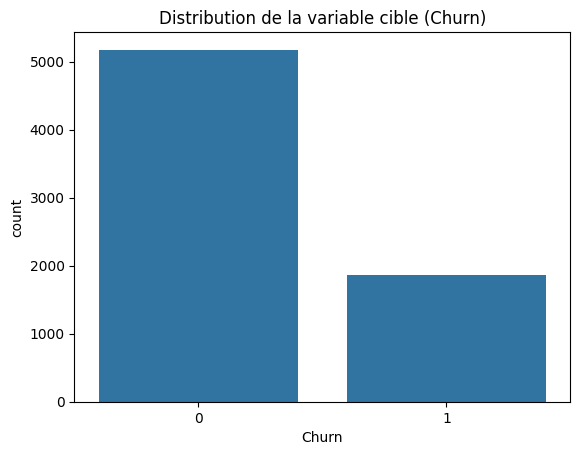

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [126]:
sns.countplot(x="Churn", data=df)
plt.title("Distribution de la variable cible (Churn)")
plt.show()

print(df["Churn"].value_counts(normalize=True))



Distribution des variables continues clés
Notamment tenure, MonthlyCharges, TotalCharges.

In [127]:
# num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

# for col in num_cols:
#     plt.figure(figsize=(6,3))
#     sns.histplot(df[col], kde=True, bins=30)
#     plt.title(f"Distribution de {col}")
#     plt.show()

In [128]:
# for col in num_cols:
#     plt.figure(figsize=(6,3))
#     sns.boxplot(x="Churn", y=col, data=df)
#     plt.title(f"{col} vs Churn")
#     plt.show()

In [129]:
corr_churn = df.corr(numeric_only=True)['Churn'].sort_values(ascending=False)
print(corr_churn)


Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling                         0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService                             0.011942
gender                                  -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents                              -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity_Yes                      -0.171226


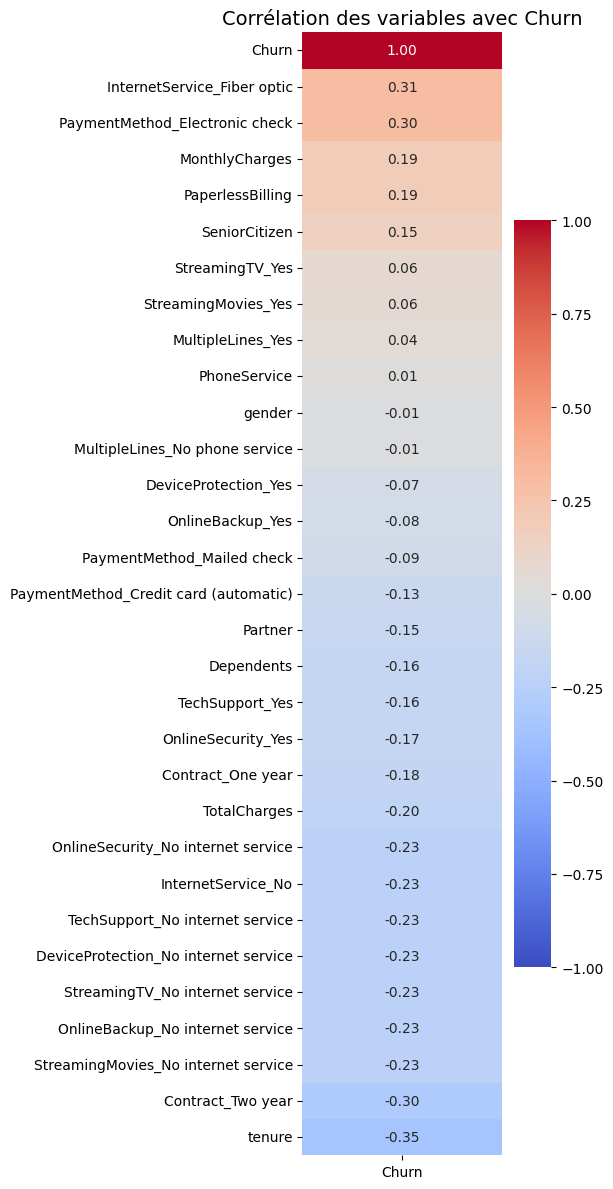

In [130]:
# corr_matrix = df.corr(numeric_only=True)

corr_churn = df.corr(numeric_only=True)[['Churn']].sort_values(by='Churn', ascending=False)


plt.figure(figsize=(6, 12))

sns.heatmap(corr_churn, annot=True, cmap='coolwarm', center=0, fmt=".2f", vmin=-1, vmax=1)

plt.title('Corrélation des variables avec Churn', fontsize=14)
plt.tight_layout()
plt.show()


In [131]:
# We need to collapse redundant columns before running VIF
df['No_internet_service'] = (
    df['OnlineSecurity_No internet service'] |
    df['OnlineBackup_No internet service'] |
    df['DeviceProtection_No internet service'] |
    df['TechSupport_No internet service'] |
    df['StreamingTV_No internet service'] |
    df['StreamingMovies_No internet service']
).astype(int)

# Drop the original redundant dummies
drop_cols = [col for col in df.columns if 'No internet service' in col]
df = df.drop(columns=drop_cols)


# Handle PhoneService redundancy
if 'MultipleLines_No phone service' in df.columns:
    df['No_phone_service'] = df['MultipleLines_No phone service'].astype(int)
    df = df.drop(columns=['MultipleLines_No phone service'])

In [132]:
df= df.dropna()
X = df.drop(columns=["Churn"])


In [133]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X.isin([np.inf, -np.inf]).sum().sum()
X = X.dropna()

# Ajout de constante pour le VIF
X_const = add_constant(X) #On ajoute un constant au X pour rendre le calul du VIF plus juste
# X_const =X

# Calcul du VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) 
                   for i in range(X_const.shape[1])]

vif_data.sort_values(by="VIF", ascending=False)


c:\Users\User\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
25,No_phone_service,inf
6,PhoneService,inf
24,No_internet_service,inf
20,InternetService_No,inf
8,MonthlyCharges,866.089640
19,InternetService_Fiber optic,148.500814
13,StreamingMovies_Yes,24.156394
16,StreamingTV_Yes,24.080019
9,TotalCharges,10.811490
5,tenure,7.584453


In [134]:
# X.describe()


4) Préprocessing pour ML


In [135]:
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import (
#     classification_report, roc_auc_score, average_precision_score,
#     precision_recall_curve, confusion_matrix
# )
# from sklearn.calibration import CalibratedClassifierCV
# import numpy as np
# import pandas as pd

# --- Données ---
y = df["Churn"].astype(int)
X = df.drop(columns=["Churn"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

THRESHOLD = 0.3  # lower than 0.5 to boost recall (see next to choose the right value)

5) Modélisation: baseline (LogisticRegression), RandomForest, XGBoost


In [136]:
# pip install lightgbm
!pip install xgboost
# print(np.__version__)
# pip install "numpy<2.0"



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, precision_recall_fscore_support
import time

models = {
    "LogisticRegression": LogisticRegression(max_iter=2000, solver="lbfgs", n_jobs=-1),
    "RandomForest": RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=300, random_state=42, n_jobs=-1),
    "XGBoost": XGBClassifier(
        n_estimators=300, 
        learning_rate=0.05, 
        max_depth=4, 
        subsample=0.8, 
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    )
}

thresholds = [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]


model_running_time=[]

for name, model in models.items():
    # print(f"\n====================== {name} ======================")
    results = []
    # Entraînement
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Probabilités pour ajuster le threshold
    start_time_pred = time.time()
    y_proba = model.predict_proba(X_test)[:, 1]
    pred_time = time.time() - start_time_pred
    print("\n Model:", name)
    
    print(classification_report(y_test, y_proba >= THRESHOLD, digits=3))

    model_running_time.append({"Model": name, "Train_Time": f"{train_time:.2f}", "Pred_Time": f"{pred_time:.2f}"})


    for thr in thresholds:
        y_pred_thr = (y_proba >= thr).astype(int)
        report = classification_report(y_test, y_pred_thr, output_dict=True)

        results.append({
            # "Model": name,
            "Threshold": thr,
            "Precision": f"{report['1']['precision']:.2f}",
            "Recall": f"{report['1']['recall']:.2f}",
            "F1-Score": f"{report['1']['f1-score']:.2f}",
            "Support": f"{report['1']['support']:.0f}"  # Support est un entier, donc .0f
        })

    results_df = pd.DataFrame(results)

    results_df = results_df.sort_values(by=["Threshold", "Recall"], ascending=[True, False]).reset_index(drop=True)

    print(results_df.to_string(index=False))
    print(" \n \n **********************************************************************")

print("\n========================Models Running Time ⏱️ in sec ============================ \n")

model_running_time_df = pd.DataFrame(model_running_time)
model_running_time_df = model_running_time_df.sort_values(by=["Train_Time"], ascending=True)
print(model_running_time_df.to_string(index=False))






 Model: LogisticRegression
              precision    recall  f1-score   support

           0      0.894     0.740     0.809      1033
           1      0.513     0.757     0.611       374

    accuracy                          0.744      1407
   macro avg      0.703     0.748     0.710      1407
weighted avg      0.792     0.744     0.757      1407

 Threshold Precision Recall F1-Score Support
      0.25      0.48   0.82     0.61     374
      0.30      0.51   0.76     0.61     374
      0.35      0.54   0.72     0.62     374
      0.40      0.58   0.68     0.62     374
      0.45      0.61   0.63     0.62     374
      0.50      0.65   0.58     0.61     374
 
 
 **********************************************************************

 Model: RandomForest
              precision    recall  f1-score   support

           0      0.886     0.738     0.805      1033
           1      0.505     0.738     0.599       374

    accuracy                          0.738      1407
   macro avg  

LogisticRegression

RandomForestClassifier

LGBMClassifier

XGBClassifier

In [145]:
models = {
    'logreg': LogisticRegression(max_iter=1000),
    'rf': RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42),
    'xgb': XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs=-1, random_state=42)
}

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

6) Tuning rapide + évaluation (ROC, AUC, matrice de confusion)

7) Logging avec MLflow (exemples pour tracker params, metrics, modèles)
